# K-Nearest Neighbors - Likelihood to Smoke
This notebook serves as an indicator for the baseline performance of the final dataset.

## Imports

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    RocCurveDisplay
)

## Initiation

In [2]:
model = KNeighborsClassifier()

#Importing training set
X_train = pd.read_csv("../00. final data/trainX.csv")
y_train = pd.read_csv("../00. final data/trainY.csv")

#Importing validation set
X_valid = pd.read_csv("../00. final data/validX.csv")
y_valid = pd.read_csv("../00. final data/validY.csv")


In [3]:
X_train.head()

,0,1,2,3,4,5,6
0,0.385093,0.454545,0.166667,0.087264,0.021053,1.0,1.0
1,0.683230,0.545455,0.388889,0.254717,0.028571,0.0,0.0
2,0.683230,0.636364,0.500000,0.283019,0.085714,1.0,1.0
3,0.559006,0.454545,0.222222,0.061321,0.018045,1.0,1.0
4,0.677019,0.909091,0.777778,0.271226,0.031579,0.0,0.0


## Model Training

In [4]:
model.fit(X_train, np.ravel(y_train, order='C'))

KNeighborsClassifier()

## Evaluation

In [5]:
y_pred = model.predict(X_valid)
acc = accuracy_score(y_pred, y_valid)
f1 = f1_score(y_pred, y_valid, average='binary')

print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.738292739350276
F1 Score: 0.7083563510477664


### Confusion Matrix

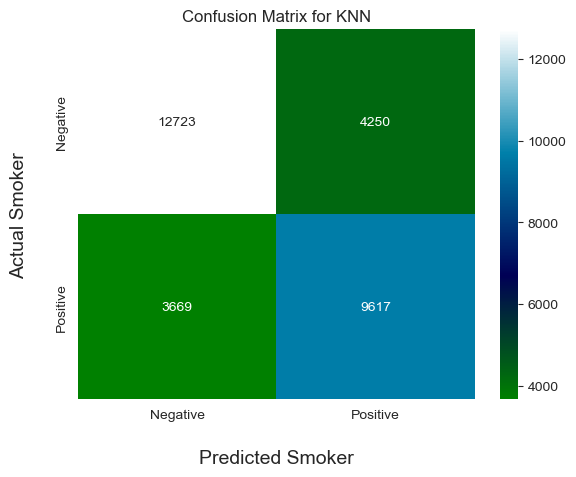

In [6]:
cm = confusion_matrix(y_valid, y_pred, labels=model.classes_)
matrix_plot = sns.heatmap(cm, annot=True, fmt="d", cmap="ocean")

matrix_plot.set_title("Confusion Matrix for KNN")
matrix_plot.set_xlabel("Predicted Smoker", fontsize=14, labelpad=20)
matrix_plot.xaxis.set_ticklabels(['Negative', 'Positive'])

matrix_plot.set_ylabel("Actual Smoker", fontsize=14, labelpad=20)
matrix_plot.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

### ROC-curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


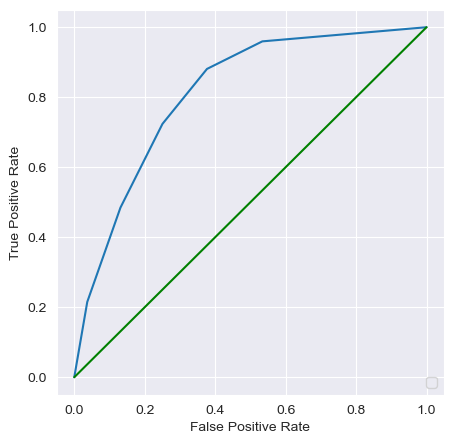

In [7]:
y_proba = model.predict_proba(X_valid)

fpr, tpr, _ = roc_curve(y_valid, y_proba[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')